# Natural Language Processing (NLP)

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Reading and Exploring Dataset

In [2]:
# Read in the raw text
rawData = open("SMSSpamCollection.tsv").read()
# Print the raw data
rawData[0:250]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup fi"

In [3]:
import pandas as pd
# Reading Tab separated Value
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label', 'body_text'], header=None)
# Print first 5 data
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

Input data has 5568 rows and 2 columns


In [5]:
# How many spam/ham are there?

print("Out of {} rows, {} are spam, {} are ham".format(len(data),
                                                       len(data[data['label']=='spam']),
                                                       len(data[data['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [6]:
# How much missing data is there?

print("Number of null in label: {}".format(data['label'].isnull().sum()))
print("Number of null in text: {}".format(data['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


## 1. Preprocessing Dataset

### Note
- **[apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) helps to apply custom functions to the Dataframe**
- ** We can also use word_tokenize for tokenizing or TextBlob**

## Remove punctuation

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


## Tokenization

In [9]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


## Remove stopwords

In [10]:
import nltk

stopword = nltk.corpus.stopwords.words('english')# All English Stopwords  You can see that the stopwords like "but", "to", "for", "to", "I", "just", "my", "had", "some", etc. have been removed

In [11]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Preprocessing Data: Using Stemming

In [12]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


## Preprocessing Data: Using a Lemmatizer

In [13]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...","[mobile, 11, month, u, r, entitled, update, la..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chanc, win, cash, 100, 20000, pound, txt...","[six, chance, win, cash, 100, 20000, pound, tx..."


## Saving the cleaned Data

In [14]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv("SMSSpamCollection_cleaned.csv", sep=',')

## Vectorizing Data: Bag-Of-Words

In [15]:
import pdb
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Read the data
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bonni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ..."
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM..."


###  Function to remove punctuation, tokenize, remove stopwords, and stem

In [16]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names_out())


(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [18]:
X_counts

<5567x8104 sparse matrix of type '<class 'numpy.int64'>'
	with 50122 stored elements in Compressed Sparse Row format>

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])

# Use get_feature_names_out() instead of get_feature_names()
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
X_counts_df.head(10)


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Vectorizing Raw Data: N-Grams

### N-Grams 
"plata o plomo means silver or lead"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["plata o", "o plomo", "plomo means", "means silver", "silver or","or lead"]      |
| 3 | trigram   | ["plata o plomo", "o plomo means", "plomo means silver", "means silver or ", "silver or lead"] |

### Apply CountVectorizer (N-Grams)

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
ngram_vect = CountVectorizer(analyzer=clean_text)
X_counts = ngram_vect.fit_transform(data['body_text'])

print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

# Convert to DataFrame
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names_out())
X_counts_df.head(10)


(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

# Use get_feature_names_out() instead of get_feature_names()
X_counts_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_counts_df.head(10)


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Vectorizing Raw Data: TF-IDF

### TF-IDF

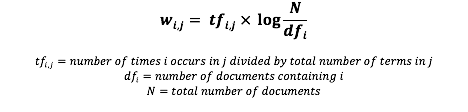

### Apply TfidfVectorizer

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the custom text cleaner function (ensure this function is defined in your code)
def clean_text(text):
    # Implement your text cleaning logic here
    # For demonstration, we will simply split the text into words and then create bigrams
    words = text.split()
    bigrams = [' '.join(bigram) for bigram in zip(words[:-1], words[1:])]
    return bigrams

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

# Convert to DataFrame
X_counts_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_counts_df.head(10)


(5567, 49786)
['! *grins*' '! *possessive' '! *pouts*' ... '… you' '…. i' '…Thanks and']


,! *grins*,! *possessive,! *pouts*,! 2,! A,! Am,! Any,! Are,! Consider,! Don't,...,… Expecting,… Head,… I'll,… and,… ill,… ish!,… we,… you,…. i,…Thanks and
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the custom text cleaner function (ensure this function is defined in your code)
def clean_text(text):
    words = text.split()
    bigrams = [' '.join(bigram) for bigram in zip(words[:-1], words[1:])]
    return bigrams

# Assuming 'data' is a DataFrame and 'body_text' is the column with the text data
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

# Convert to DataFrame (keeping the sparse matrix)
X_tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)


(5567, 49786)
['! *grins*' '! *possessive' '! *pouts*' ... '… you' '…. i' '…Thanks and']


,! *grins*,! *possessive,! *pouts*,! 2,! A,! Am,! Any,! Are,! Consider,! Don't,...,… Expecting,… Head,… I'll,… and,… ill,… ish!,… we,… you,…. i,…Thanks and
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

      ! *grins*  ! *possessive  ! *pouts*  ! 2  ! A  ! Am  ! Any  ! Are  \
0           0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
1           0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
2           0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
3           0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
4           0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
...         ...            ...        ...  ...  ...   ...    ...    ...   
5562        0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
5563        0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
5564        0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
5565        0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   
5566        0.0            0.0        0.0  0.0  0.0   0.0    0.0    0.0   

      ! Consider  ! Don't  ...  … Expecting  … Head  … I'll  … and  … ill  \
0            0.0      

## Feature Engineering: Feature Creation

In [25]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length and % of punctuation in text 

In [26]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [27]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

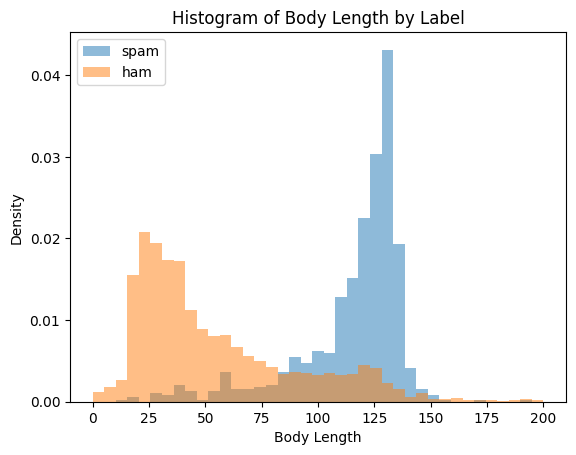

In [28]:
# Assuming 'data' is a DataFrame with 'label' and 'body_len' columns
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.xlabel('Body Length')
plt.ylabel('Density')
plt.title('Histogram of Body Length by Label')
plt.show()

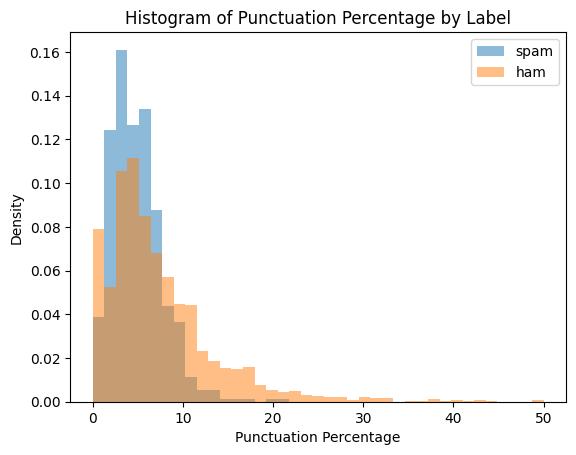

In [29]:
# Assuming 'data' is a DataFrame with 'label' and 'punct%' columns
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.xlabel('Punctuation Percentage')
plt.ylabel('Density')
plt.title('Histogram of Punctuation Percentage by Label')
plt.show()


## Building ML Classifiers:Model Selection Random Forest with GridSearchCV

### Exploring parameters using GridSearchCV

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For CountVectorizer 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assuming 'data' is a DataFrame with 'body_text' and 'label' columns
# Limiting the number of features
count_vect = CountVectorizer(max_features=5000, analyzer=clean_text)
X_count_feat = count_vect.fit_transform(data['body_text'])

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,10.373253,0.661999,0.062677,0.009884,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.974865,0.973944,0.971249,0.968553,0.973234,0.003089,1
7,9.830502,1.709916,0.059624,0.006377,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.978456,0.973968,0.973046,0.968553,0.971249,0.973054,0.003272,2
8,19.218981,1.845805,0.103296,0.012595,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.973070,0.973944,0.969452,0.966757,0.972336,0.004001,3
11,16.426295,1.188180,0.103252,0.007503,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.973070,0.973046,0.966757,0.969452,0.972156,0.003944,4
4,8.818679,2.617362,0.062615,0.024127,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.976661,0.973070,0.970350,0.967655,0.965858,0.970719,0.003847,5


### For TF-IDFVectorizer 

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the custom text cleaner function (ensure this function is defined in your code)
def clean_text(text):
    words = text.split()
    bigrams = [' '.join(bigram) for bigram in zip(words[:-1], words[1:])]
    return bigrams

# Assuming 'data' is a DataFrame with 'body_text' and 'label' columns
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf_feat = tfidf_vect.fit_transform(data['body_text'])

# Convert feature names to strings
feature_names = tfidf_vect.get_feature_names_out()
feature_names = [str(name) for name in feature_names]

# Proceed with the grid search
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,71.002141,3.016852,0.191205,0.018185,None,150,"{'max_depth': None, 'n_estimators': 150}",0.950628,0.947038,0.948787,0.938904,0.955975,0.948266,0.005558,1
11,114.416708,8.910676,0.359745,0.040776,None,300,"{'max_depth': None, 'n_estimators': 300}",0.949731,0.947038,0.948787,0.939802,0.955076,0.948087,0.004935,2
9,4.847270,0.254318,0.018750,0.006247,None,10,"{'max_depth': None, 'n_estimators': 10}",0.946140,0.942549,0.944295,0.932615,0.951482,0.943416,0.006175,3
6,2.081269,0.179633,0.011497,0.006067,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.930880,0.926391,0.929021,0.918239,0.934412,0.927788,0.005442,4
8,54.403145,0.879406,0.142820,0.019547,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.930880,0.929982,0.929021,0.914645,0.929021,0.926710,0.006072,5
